# TAREA 3.2 Queries

### Problema 1

1) Structured Query Language (SQL) es un lenguaje de programación de propósito especial, es usado para hacer un manejo de una base de datos relacionable y realizar distintas operaciones sobre los datos que se encuentran en ella.  

2) 
SELECT gaia.source_id, gaia.hip,gaia.phot_g_mean_mag+5*log10(gaia.parallax)-10 as g_mag_abs_gaia, gaia.phot_g_mean_mag+5*log10(hip.plx)-10 as g_mag_abs_hip, hip."B-V"

FROM "I/337/tgas" AS gaia

INNER JOIN "I/311/hip2" as hip

ON gaia.hip = hip.HIP

WHERE gaia.parallax/gaia.parallax_error >= 5 AND
hip.Plx/hip.e_Plx >= 5 AND
hip."e_B-V" > 0.0 and hip."e_B-V" <= 0.05 AND
(2.5/log(10))*(gaia.phot_g_mean_flux_error/gaia.phot_g_mean_flux) <= 0.05

El comando __SELECT__ selecciona datos de una base de datos. En este caso se obtienen los datos; source_id, hip (que es el nombre de catalogo, hipparcos en específico, del objeto), la magnitud absoluta G, la magnitud absoluta hip, el color B-V.

El comando __FROM__ me asigna la base de datos (en este caso, catálogo) de donde quiero obtener los datos que necesito.

El comando __INNER JOIN__ selecciona las filas de ambas tablas, en este caso entre *gaia* y *hip*, siempre y cuando hayan coincidencias entre las columnas de ambas tablas.

El comando __ON__ realiza el match entre los datos coincidentes de ambas tablas.

El comando __WHERE__ asigna condiciones acerca de los datos que deso utilizar para trabajar. Para este caso, se impone que la relación entre el paralaje y el error del paralaje sea mayor e igual a 5,para los valores en del catálogo gaia y hip. Esto busca los paralajes cuyo error de medición sea bajo. Se pide también que los errores del color B-V sea entre 0.0 y 0.05, lo mismo para los flujos de la tabla de gaia. En resumen se toman las condiciones de la señal a ruido para estos observables.

3) 

In [8]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import act4 as a4 #Importo el código act4.py sacado del repositorio de nombre Experimental del profe.

#Defino los parámetros necesita la funion "query_TAP" que me entregará una tabla.
tap="http://tapvizier.u-strasbg.fr/TAPVizieR/tap"
adql="""SELECT gaia.source_id, gaia.hip, gaia.phot_g_mean_mag+5*log10(gaia.parallax)-10 as g_mag_abs_gaia, gaia.phot_g_mean_mag+5*log10(hip.plx)-10 as g_mag_abs_hip, hip."B-V"
FROM "I/337/tgas" AS gaia
INNER JOIN "I/311/hip2" as hip
ON gaia.hip = hip.HIP
WHERE gaia.parallax/gaia.parallax_error >= 5 AND
hip.Plx/hip.e_Plx >= 5 AND
hip."e_B-V" > 0.0 and hip."e_B-V" <= 0.05 AND
(2.5/log(10))*(gaia.phot_g_mean_flux_error/gaia.phot_g_mean_flux) <= 0.05"""

Tabla=a4.query_TAP(tap,adql)
Tabla

Populating the interactive namespace from numpy and matplotlib


/home/juanito/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cond']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


source_id [1],hip [1],g_mag_abs_gaia [1],g_mag_abs_hip [1],B-V [1]
,,mag,mag,mag
int64,int32,float64,float64,float64
6573602993063998848,109795,2.87160300908,2.45642582017,0.631
6573655460384085888,109508,2.60984667835,2.52287954206,0.646
6573729196383276544,109901,5.38885950082,5.2669742502,0.828
6573753591797024000,110115,5.7858514758,5.3050921695,0.965
6573981087624594816,109455,3.69903268771,3.66261809916,0.464
6574012080108969600,109595,3.09765842266,3.60122397773,0.387
6574081349341199872,109489,4.66990623024,4.46511319184,0.763
6574301973221214848,108950,3.45515927014,3.51061357103,0.718


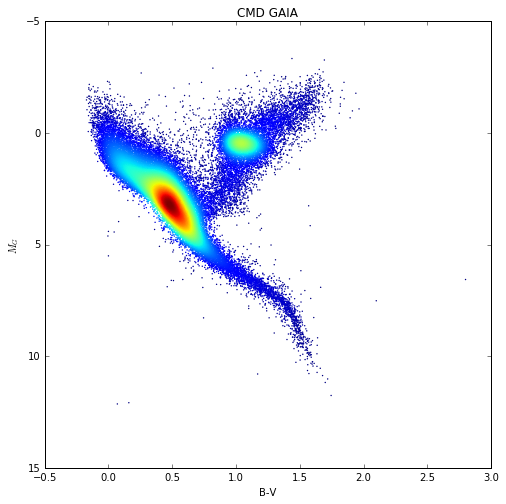

In [2]:
#El plot hecho con los datos de la magnitud absoluta G gaia
a4.plot_scatter_density(Tabla,"B-V","g_mag_abs_gaia","B-V","$M_G$","CMD GAIA")

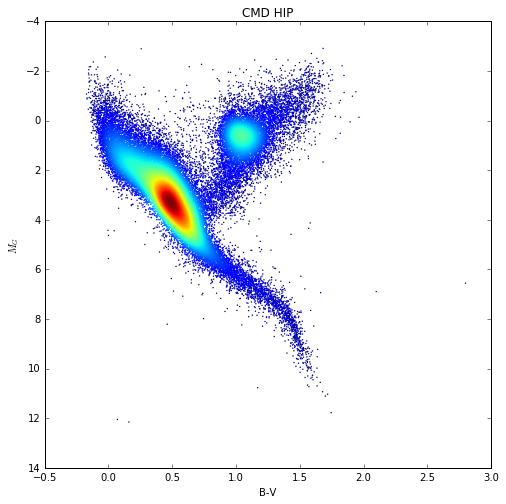

In [3]:
#Plot hecho con los datos de la magnitud absoluta G hip
a4.plot_scatter_density(Tabla,"B-V","g_mag_abs_hip","B-V","$M_G$","CMD HIP")

__Fuentes:__
> http://www.w3schools.com/sql/sql_where.asp

>https://github.com/andres-jordan/experimental/blob/master/act4.py

### Problema 2

1) El Sloan Digital Sky Sourvey es un proyecto en el cual se desea investigar el espacio mediante la obtenciónde imágenes, de espectros y de corrimiento al rojo. Está instalado en un telescopio de 2.5 m y un amplio ángulo, situado en el observatorio Apache Point en Nuevo Mexico.

Se utilizó el SDSS para cartografiar un tercio del cielo visible. Luego se registraron 500 millones de objetos y espectros de 3 millones de objetos. Dentro de los objetos detectados hay galaxias y supernovas que trae como consecuencia el poder medir distancias. 

En la actualidad, se siguen haciendo observaciones para seguir ampliando nuestro conocimiento con respecto a estructura del universo.


2) __SELECT
G.ra, G.dec, S.mjd, S.plate, S.fiberID,
S.z, S.zErr, S.rChi2, S.velDisp, S.velDispErr,
G.extinction_r, G.petroMag_r, G.psfMag_r, G.psfMagErr_r,
G.modelMag_u, G.modelMagErr_u, G.modelMag_g, G.modelMagErr_g,
G.modelMag_r, G.modelMagErr_r, G.modelMag_i, G.modelMagErr_i,
G.modelMag_z, G.modelMagErr_z, G.petroR50_r, G.petroR90_r,
GSL.nii_6584_flux, GSL.nii_6584_flux_err, GSL.h_alpha_flux,
GSL.h_alpha_flux_err, GSL.oiii_5007_flux, GSL.oiii_5007_flux_err,
GSL.h_beta_flux, GSL.h_beta_flux_err, GSL.h_delta_flux, GSL.h_delta_flux_err,
GSX.d4000, GSX.d4000_err, GSE.bptclass,
GSE.lgm_tot_p50, GSE.sfr_tot_p50, G.objID, GSI.specObjID__

En este querie se piden obtener las coordenadas de cada objeto, la configuracion de las fibras del espectrógrafo (S.plate), la identificación de la fibra en la que fue captada el objeto (S.fiberID), el redshift y su error, la dispersión de las velocidades y su error, las magnitudes u, g, r, i y z, junto a sus errores, los flujos y los errores de los flujos de NII, $H_\alpha$, OIII, $H_\beta$ y $H_\delta$, GSX.d4000 que es un índice de medicioón de flujo en una parte del espectro, GSE-bptclass que me entrega las categorías de los espectros.

__INTO mydb.SDSS FROM SpecObj S CROSS APPLY
dbo.fGetNearestObjEQ(S.ra, S.dec, 0.06) N, Galaxy G,
GalSpecInfo GSI, GalSpecLine GSL, GalSpecIndx GSX,
GalSpecExtra GSE__

Aquí vemos las ditintas bases de datos (tablas) de donde se extrajo la información de galaxias, sus espectros, las líneas espectrales, indices.También se hace el match donde se crea una sola tabla con toda la info.

__WHERE N.objID = G.objID
AND GSI.specObjID = S.specObjID
AND GSL.specObjID = S.specObjID
AND GSX.specObjID = S.specObjID
AND GSE.specObjID = S.specObjID
AND (G.petroMag_r > 10 AND G.petroMag_r < 18)
AND (G.modelMag_u - G.modelMag_r) > 0
AND (G.modelMag_u - G.modelMag_r) < 6
AND (modelMag_u > 10 AND modelMag_u < 25)
AND (modelMag_g > 10 AND modelMag_g < 25)
AND (modelMag_r > 10 AND modelMag_r < 25)
AND (modelMag_i > 10 AND modelMag_i < 25)
AND (modelMag_z > 10 AND modelMag_z < 25)
AND S.rChi2 < 2
AND (S.zErr > 0 AND S.zErr < 0.01)
AND S.z > 0.02__

En esta parte se asignaron las condiciones de búsqueda en la base de datos para definir, finalmente, la tabla deseada. 

3) Vamos a revisar el contenido de la tabla fits (Aun que ya sé lo que lleva al observar el query)

In [9]:
SDSS=fits.open('SDSS_Juan9315.fit')
SDSS.info()

Filename: SDSS_Juan9315.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU    100   661598R x 43C   [1D, 1D, 1J, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1E, 1E, 1K, 1K]   


In [10]:
SDSS[1].header

XTENSION= 'BINTABLE'                                                            
BITPIX  =                    8                                                  
NAXIS   =                    2                                                  
NAXIS1  =                  182                                                  
NAXIS2  =               661598                                                  
PCOUNT  =                    0                                                  
GCOUNT  =                    1                                                  
TFIELDS =                   43                                                  
TFORM1  = '1D'                                                                  
TTYPE1  = 'ra'                                                                  
TTYPE2  = 'dec'                                                                 
TFORM2  = '1D'                                                                  
TTYPE3  = 'mjd'             

**Diagrama BPT**: Es un gráfico de dispersión donde recibe como información la razón entre OIII y $H_\beta$, en las ordenadas, y la razón entre NII y $H_\alpha$, en las abscisas. La finalidad de este diagrama es distinuir los mecanismos de ionización de las nubes de gas y así distiguir los liner de los starbust y un AGN. 

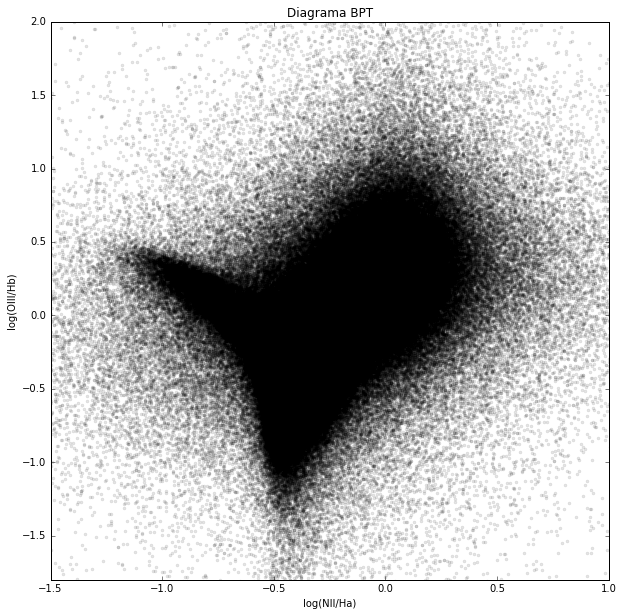

In [6]:
import fitsio

SDSS = fitsio.read('SDSS_Juan9315.fit')
# Condición para elimnar los ceros de las tablas
cond = ((SDSS['nii_6584_flux']>0) & (SDSS['oiii_5007_flux']>0) & (SDSS['h_alpha_flux']>0) & (SDSS['h_beta_flux']>0))
# Defino listas para luego plotear el diagrama    
OIII=SDSS['oiii_5007_flux'][cond]
NII=SDSS['nii_6584_flux'][cond]
Ha=SDSS['h_alpha_flux'][cond]
Hb=SDSS['h_beta_flux'][cond]
#Defino los ejes
x=np.log10(NII/Ha)
y=np.log10(OIII/Hb)

#Ploteo del diagrama
plt.subplots(figsize=(10,10))
mitad=len(x)/2
plt.plot(x[0:mitad],y[0:mitad],'k.',alpha=.1)
plt.plot(x[mitad+1:],y[mitad+1:],'k.',alpha=.1)
plt.title("Diagrama BPT")
plt.ylabel("log(OIII/Hb)")
plt.xlabel("log(NII/Ha)")
plt.xlim(-1.5,1)
plt.ylim(-1.8,2)
    
plt.show()



en la parte de la izquierda se encuentran las galaxias con regiones HII que son zonas ionizadas por estrellas calientes, y en la parte superior derecha se encuentran los AGN's que son las zonas más ionizadas que las regiones HII. Es dificl apreciar la división entre estas 2 clases de ojetos, debido a que la figura esta muy compacta.

### Problema 3

Los tamplates, en este caso, son modelos de espectros de distintos objetos. Para descargar los tamplates y graficar los espectros de los objetos dentro de éste utilizaré el ejemplo del enunciado y me guiaré con las siguientes páginas: http://astroquery.readthedocs.io/en/latest/sdss/sdss.html y http://classic.sdss.org/dr7/dm/flatFiles/spSpec.html.

Antes de correr el programa, debo descargar el paquete astroquery usando *pip install astroquery*.

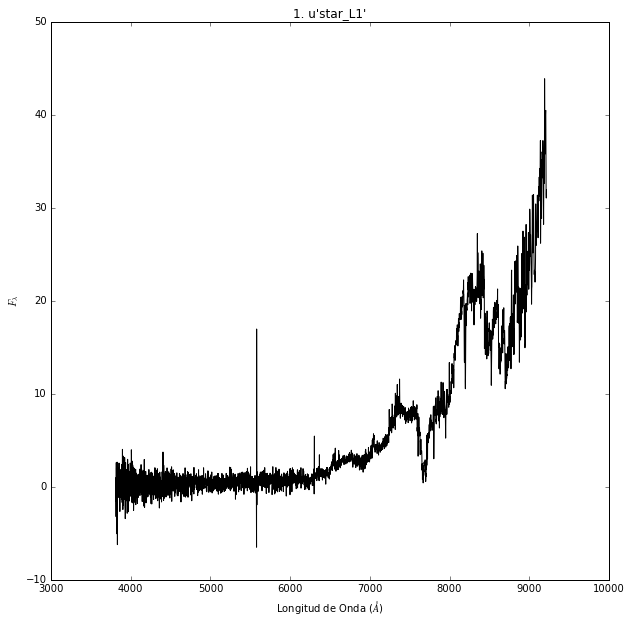

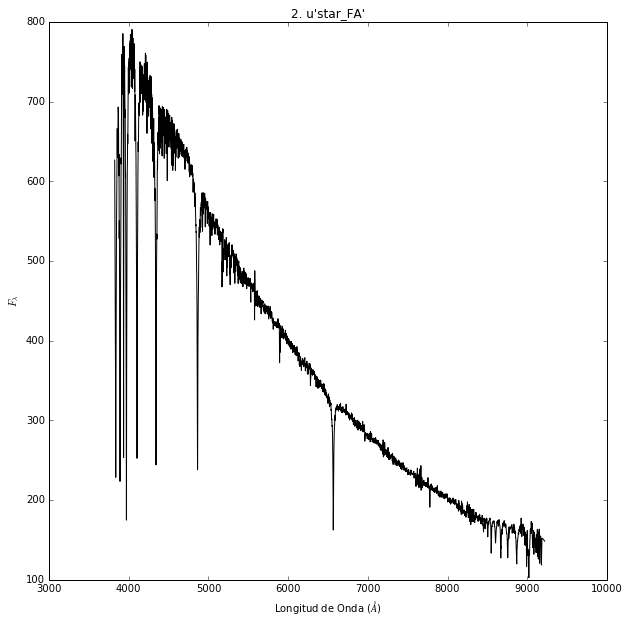

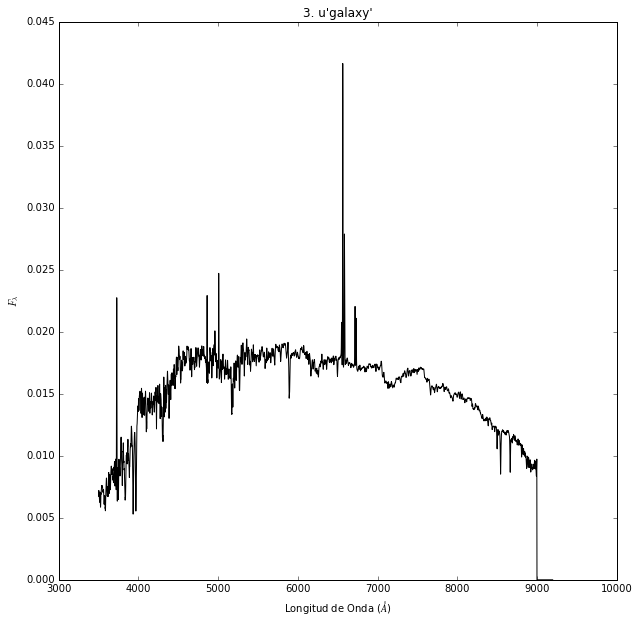

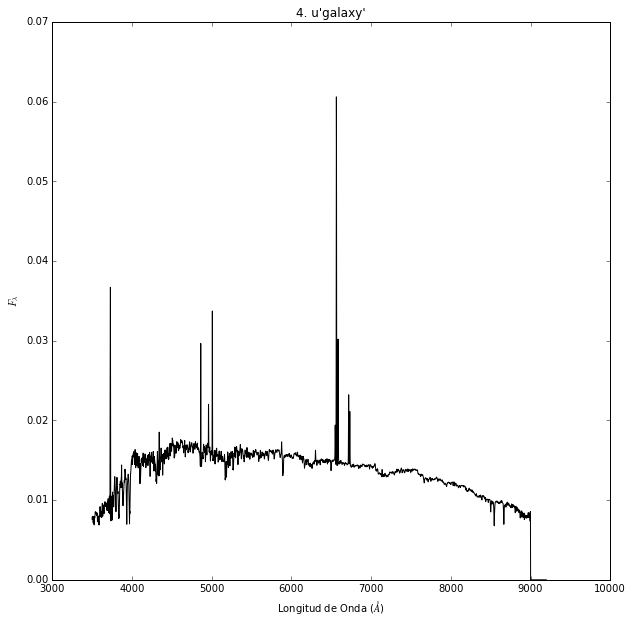

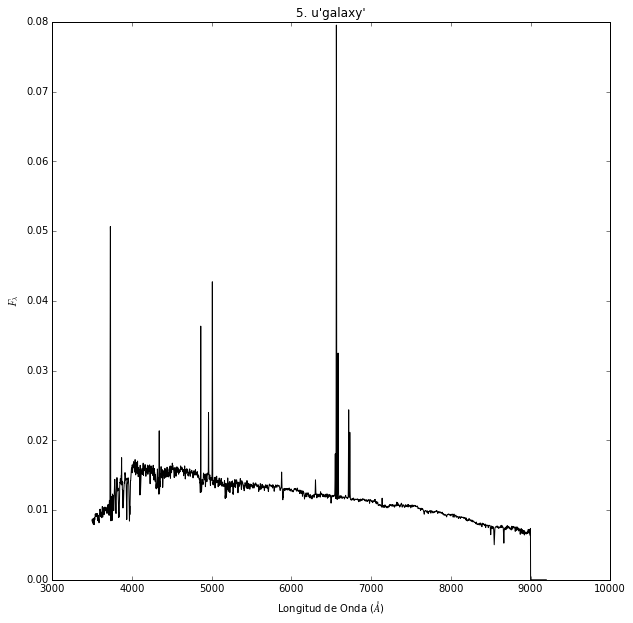

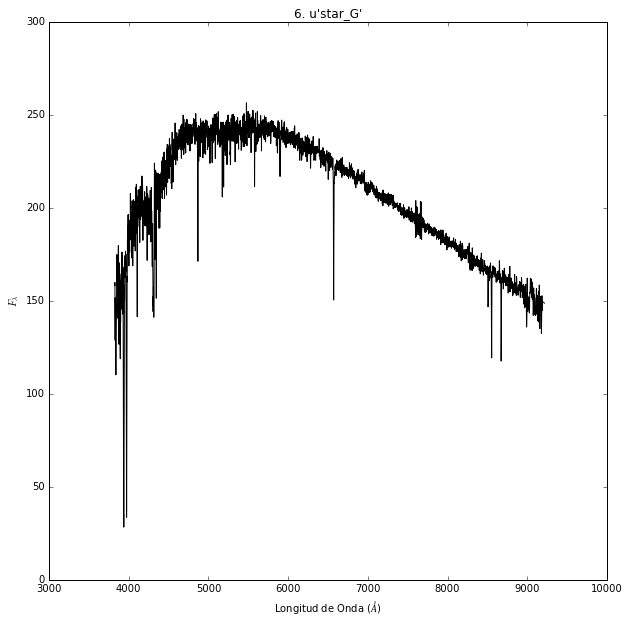

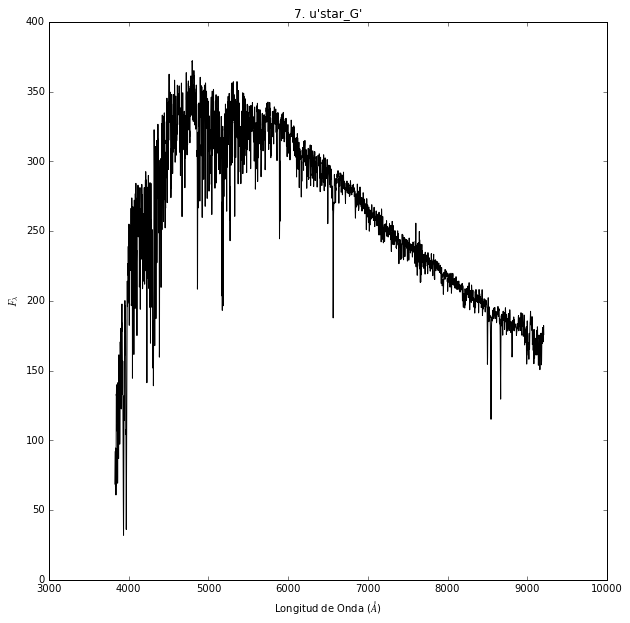

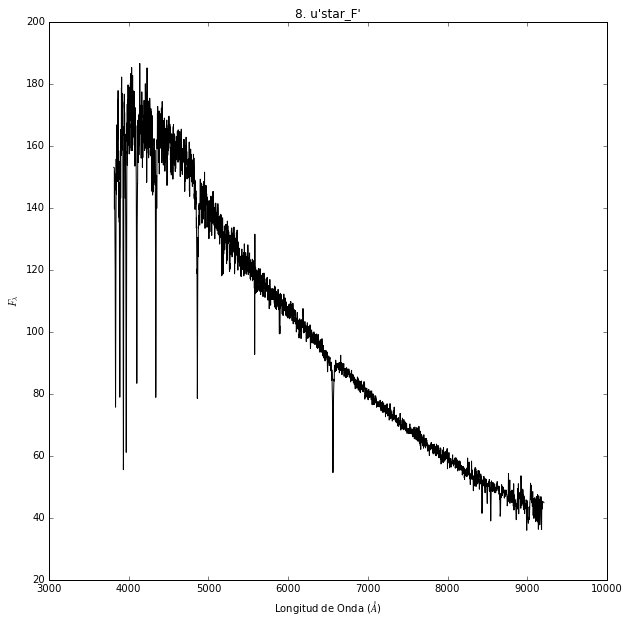

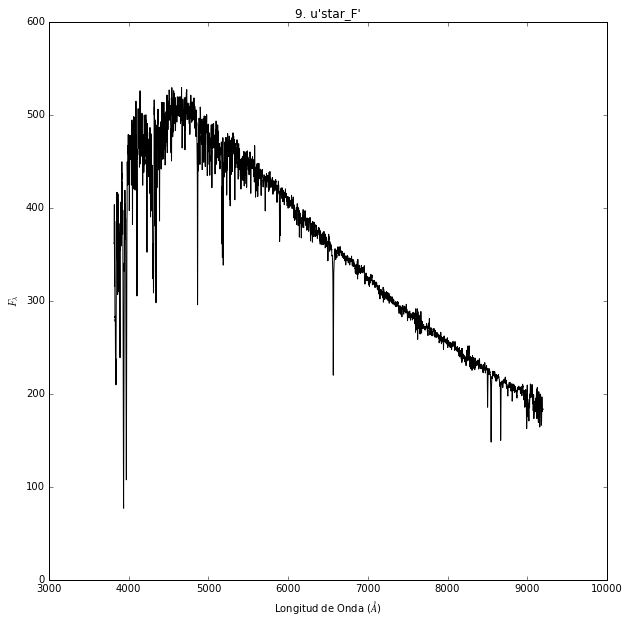

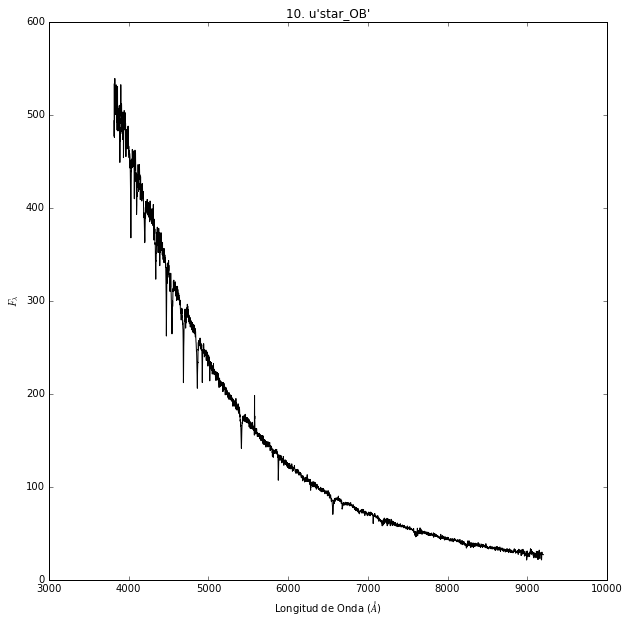

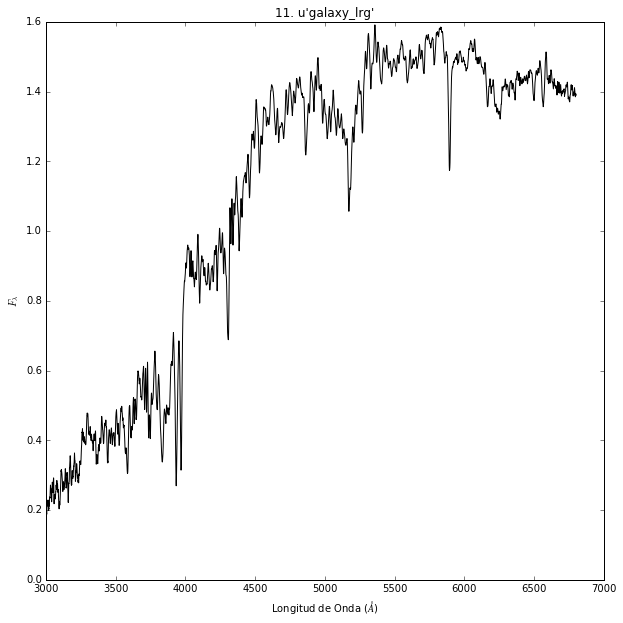

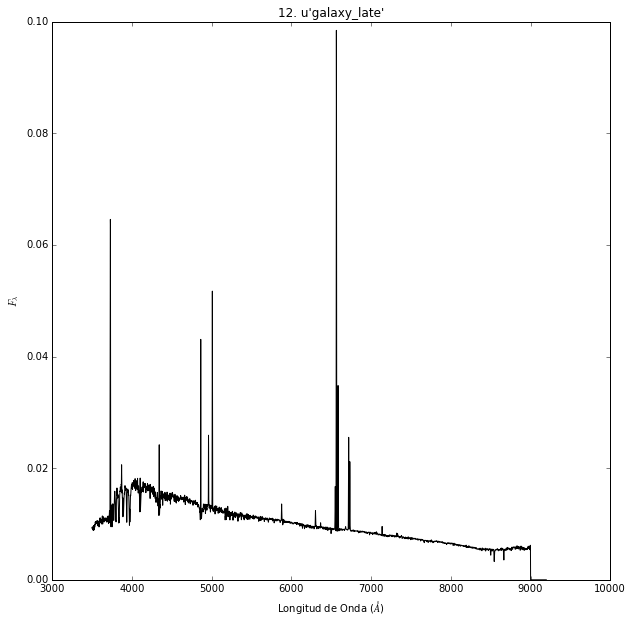

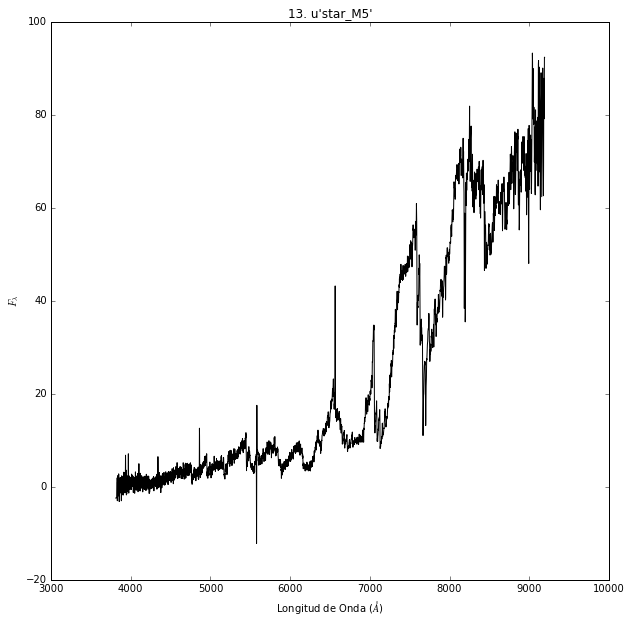

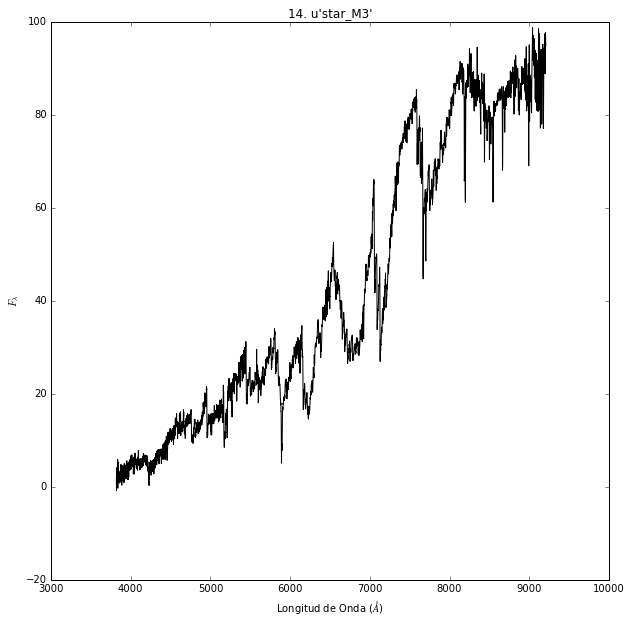

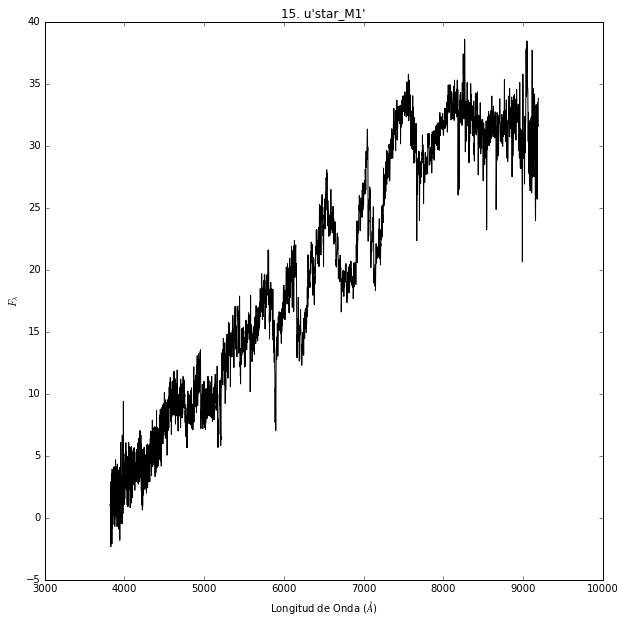

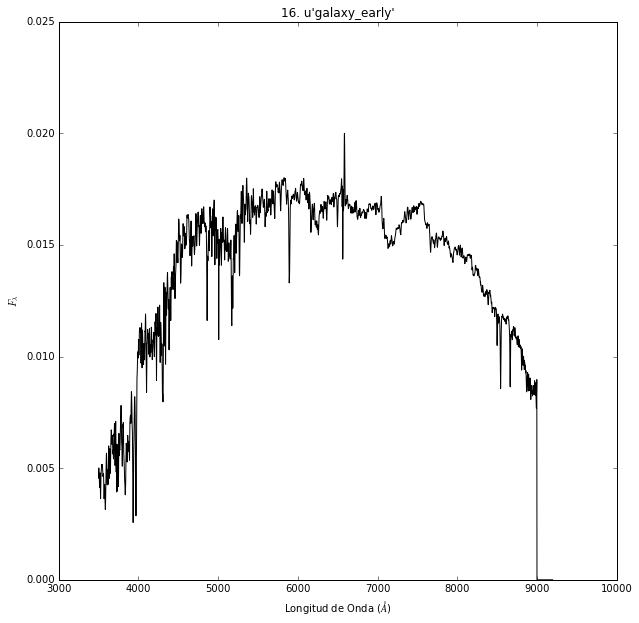

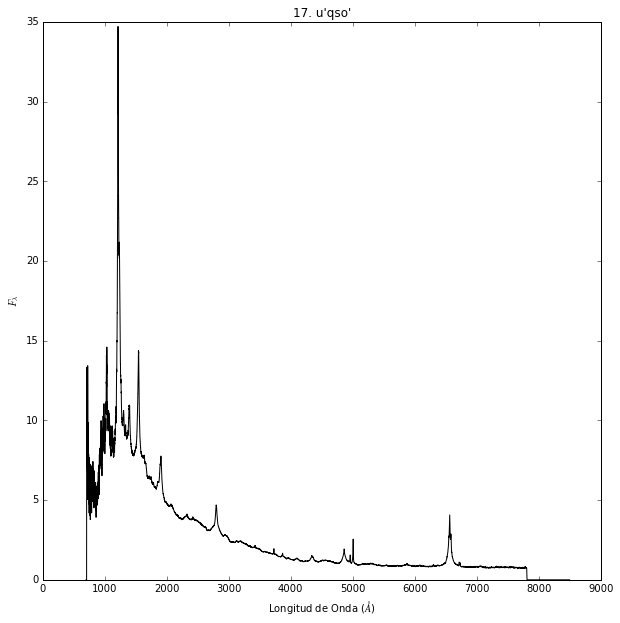

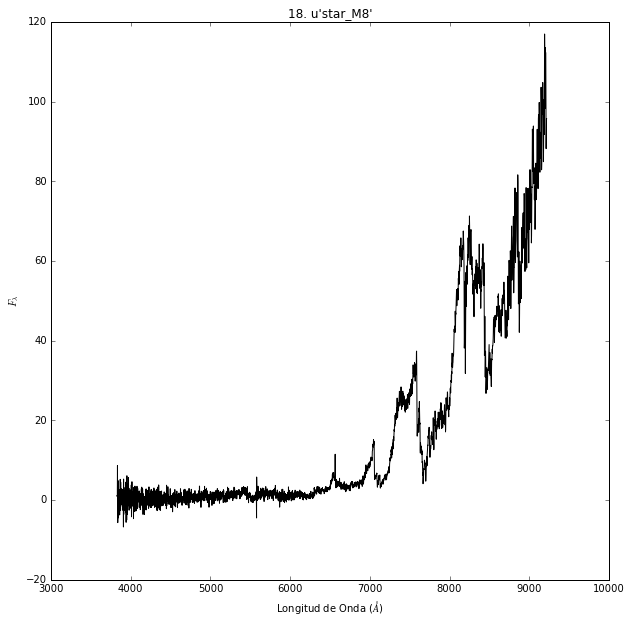

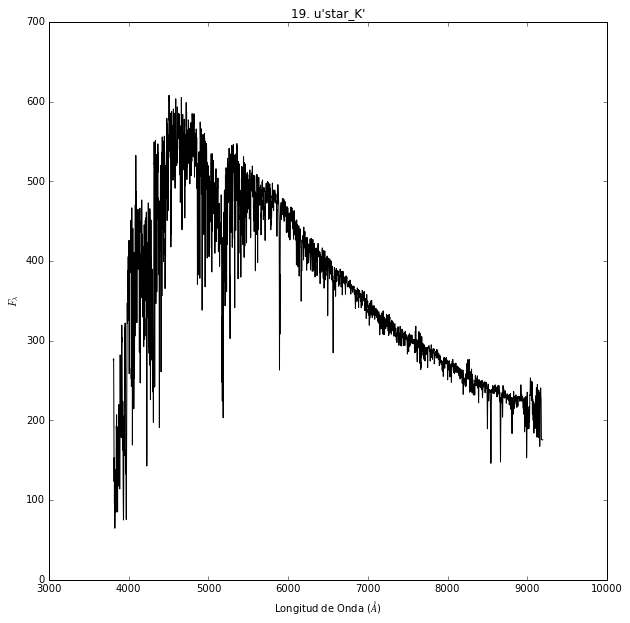

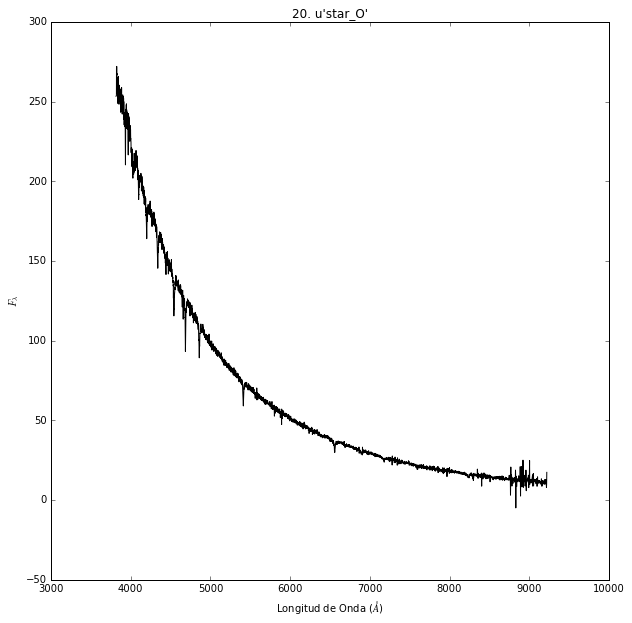

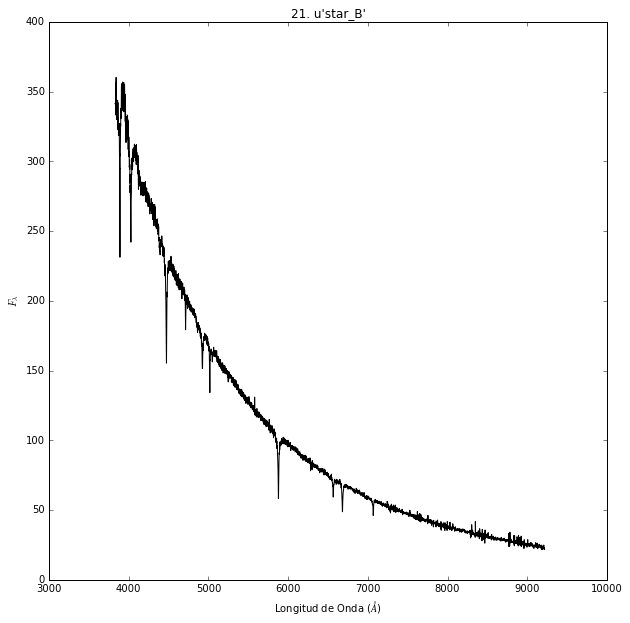

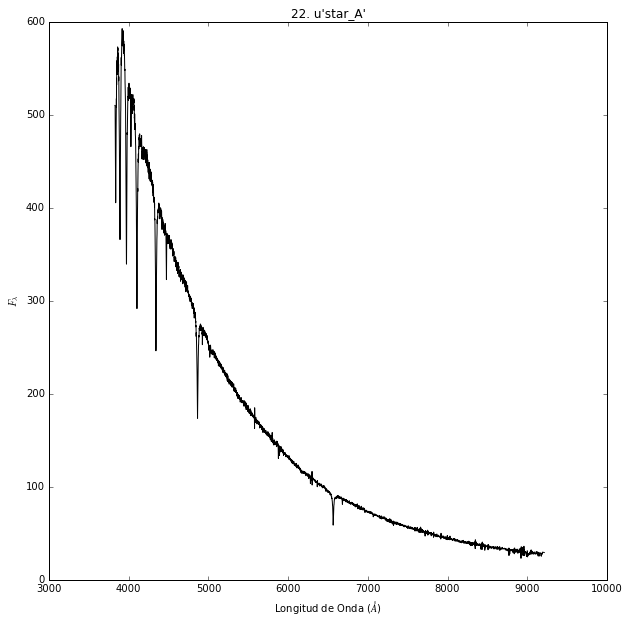

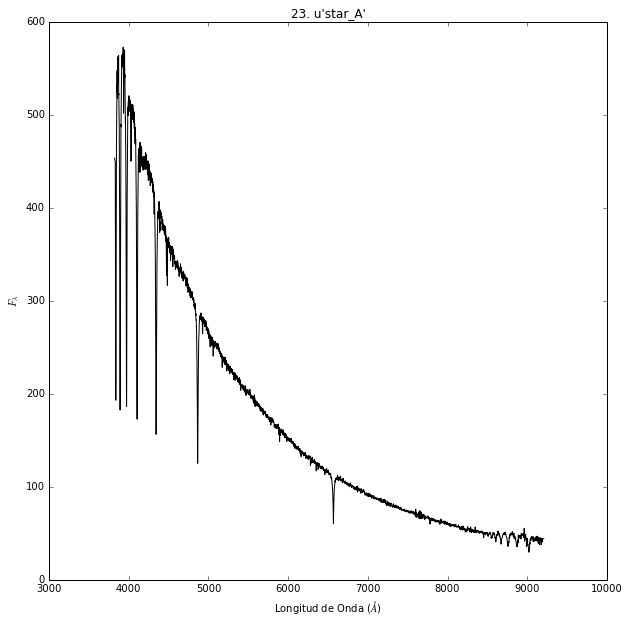

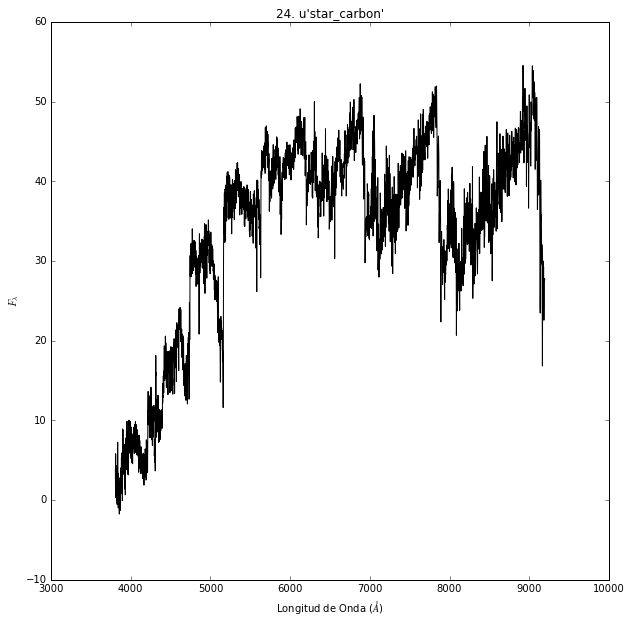

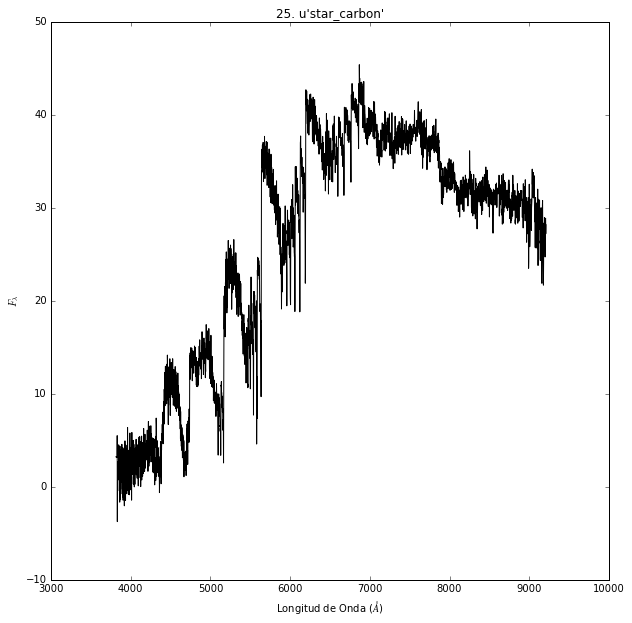

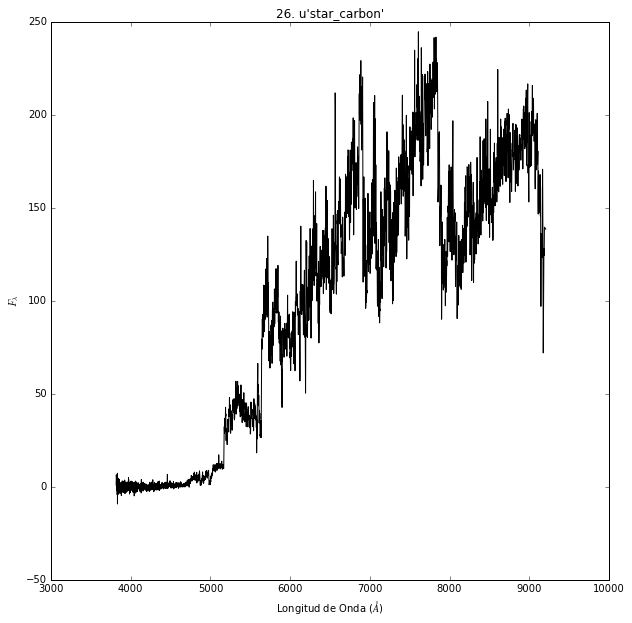

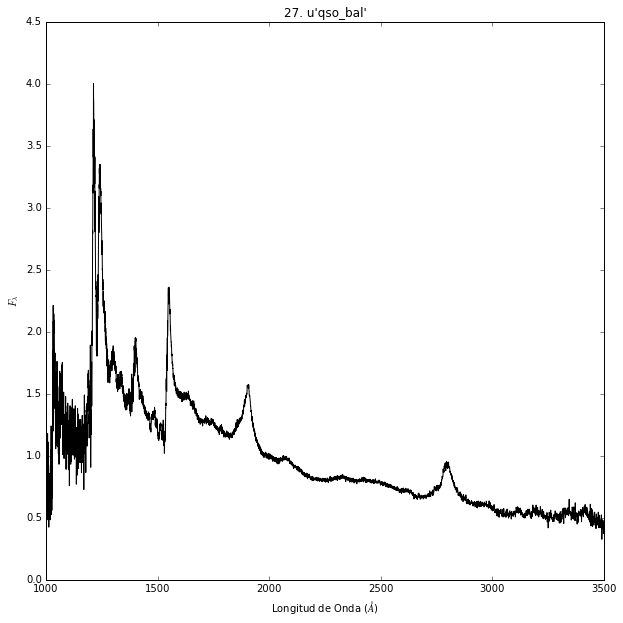

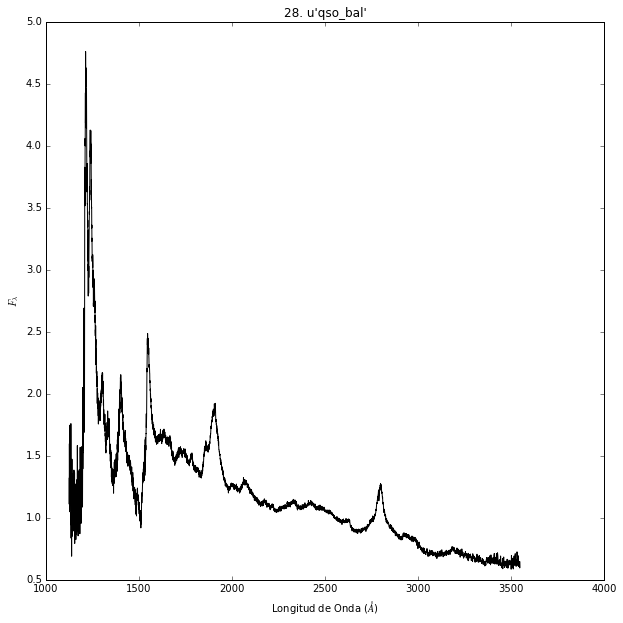

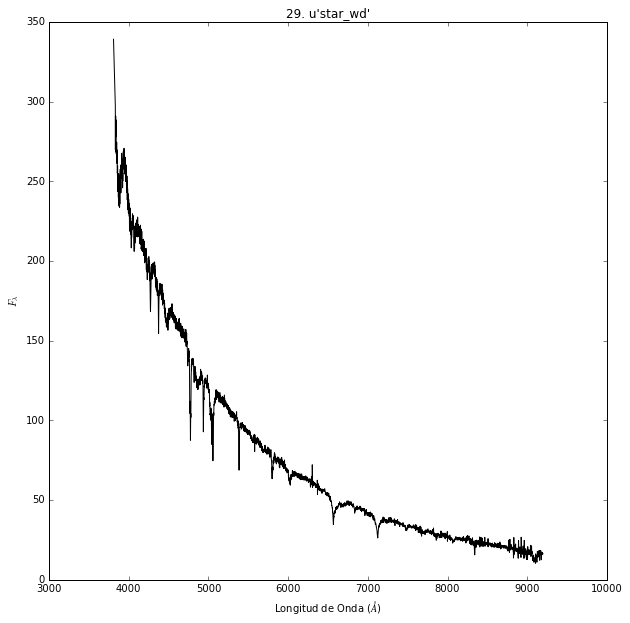

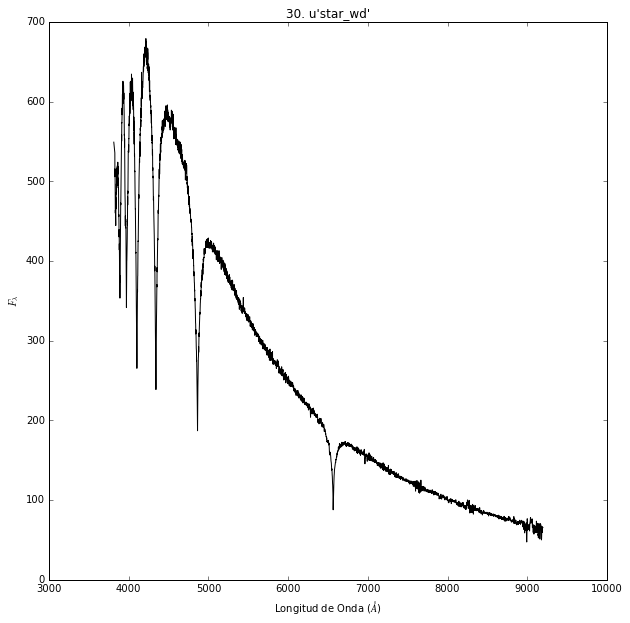

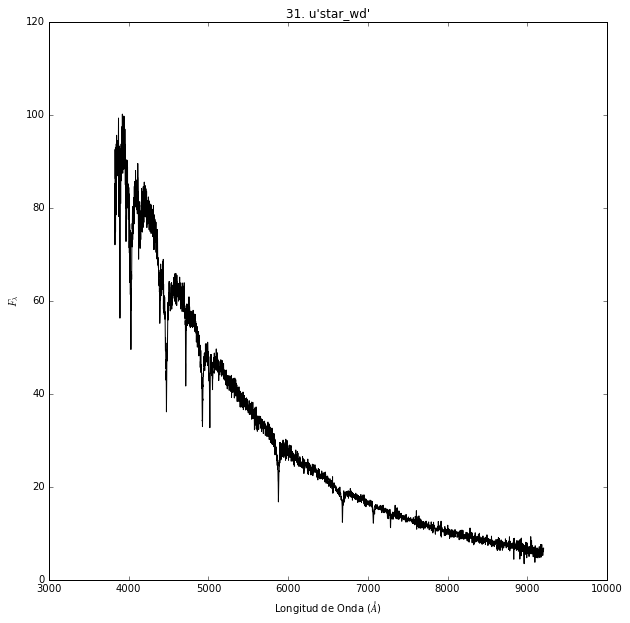

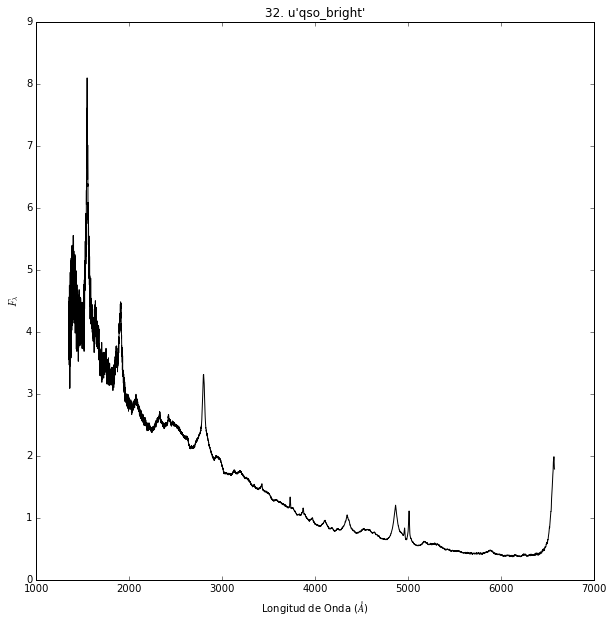

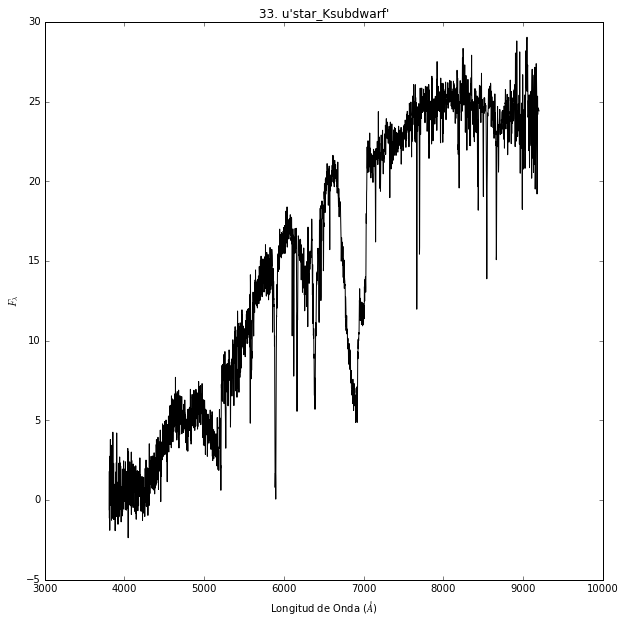

In [17]:
from astroquery.sdss import SDSS

j = 1 # numero de plot
for template in SDSS.AVAILABLE_TEMPLATES:
    result = SDSS.get_spectral_template(template)
    
    for i in range(0, len(result)):
        hdulist = result[i]
        c0 = hdulist[0].header['coeff0']
        c1 = hdulist[0].header['coeff1']
        npix = hdulist[0].header['naxis1']
        wave = 10.**(c0 + c1 * np.arange(npix))
        flux = hdulist[0].data[0,:]  
        
        ### defino las lineas de absorción/emisión que se encuentran en HDUlist 1.
        line = hdulist[1].header['TTYPE1']
        ### Ploteo de los gráficos Flujo vs longitud de onda
        
        plt.subplots(figsize=(10,10))
        plt.plot(wave, flux, 'k-')
        #plt.plot(line, flux, '.b')
        plt.title(repr(j)+'. '+repr(template))
        plt.ylabel("$F_\lambda$")
        plt.xlabel("Longitud de Onda ($\AA$)")
        plt.show()
        plt.close()
        
        j = j+1